# Text Augmentation

In [1]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image
im_name = "data/selected_fashion_bl/t_shirt/oblong15.jpg"
img = cv2.imread(im_name)
img = Image.fromarray(img)

draw = ImageDraw.Draw(img)

# use a truetype font
font = ImageFont.truetype("arial.ttf", 100)

draw.text((10, 25), "world", font=font)

img = np.array(img)
name = im_name.split('/')[-1]
name = "labelled_image/" + name
cv2.imwrite(name, img)

True

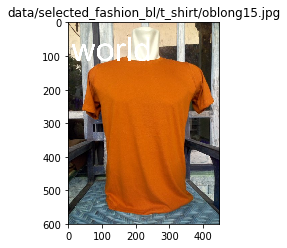

In [3]:
import matplotlib.pyplot as plt
# %matplotlib inline  

# draw image
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title(im_name)
plt.imshow(img)


In [5]:
import glob
import os
import shutil
import sys

# import list of images
DATA_DIR = "/home/mhilmiasyrofi/ocr/notebook/data/"
# im_names = glob.glob(os.path.join(DATA_DIR, 'fashion_bl/', 'sample_comparation/*/*.png')) \
#         + glob.glob(os.path.join(DATA_DIR, 'fashion_bl/', 'sample_comparation/*/*.jpg'))

im_names = glob.glob(os.path.join(DATA_DIR, 'fashion_bl/', 'sample_comparation/coba/*.png'))

for im_name in im_names:
#     print(im_name)
    img = cv2.imread(im_name)
    img = Image.fromarray(img)

    draw = ImageDraw.Draw(img)

    # use a truetype font
    font = ImageFont.truetype("arial.ttf", 80)

    name = im_name.split('/')[-1]
    name = name.split('.')[0]
    name = name + ".jpg"
    draw.text((10, 25), name, font=font)

    img = np.array(img)
    
    name = "labelled_image/" + name
    cv2.imwrite(name, img)

### Convert image from PNG to JPG

In [12]:
# import glob
# import os
# import shutil
# import sys

# # import list of images
# DATA_DIR = "data/"
# im_names = glob.glob(os.path.join(DATA_DIR, 'selected_fashion_bl/', '*/*.png'))


# for im_name in im_names:
# #     print(im_name)
#     img = cv2.imread(im_name)
    
#     name = im_name.split('.')[0]
#     name = name + ".jpg"
    
#     cv2.imwrite(name, img)

### Create annotation from an image

In [44]:
import glob
import os
import shutil
import sys
from PIL import ImageFont, ImageDraw, Image
import random

im_name = "data/selected_fashion_bl/t_shirt/oblong15.jpg"
image = Image.open(im_name)
draw = ImageDraw.Draw(image)
txt = "Hello World"
fontsize = 1  # starting font size

# portion of image width you want text width to be
img_fraction = float(random.randint(25, 50)) / 100.0
# print(img_fraction)

list_name = glob.glob(os.path.join('font/', '*.ttf')) + glob.glob(os.path.join('font/', '*.otf'))
# list_name = ["font/Chunkfive.otf", "font/arial.ttf" "font/Rubik-Black.ttf", "font/Monsterrat-.ttf"]
list_color = ["orange", "black", "blue", "green", "violet"]

font_name = random.choice(list_name)
font_color = random.choice(list_color)

font = ImageFont.truetype(font_name, fontsize)
while font.getsize(txt)[0] < img_fraction*image.size[0]:
    # iterate until the text size is just larger than the criteria
    fontsize += 1
    font = ImageFont.truetype(font_name, fontsize)

# optionally de-increment to be sure it is less than criteria
fontsize -= 1
font = ImageFont.truetype(font_name, fontsize)


w,h = font.getsize(txt)

padding = 5
top_left = (random.randint(padding, image.size[0]- w - padding), random.randint(padding, image.size[1] - h - padding))
rectangle = ((top_left[0] - padding, top_left[1] - padding), (w + top_left[0] + padding, h + top_left[1] + padding))
if random.randint(40, 100) > 50 :    
    draw.rectangle(rectangle, fill=font_color)
draw.text(top_left, txt, font=font) # put the text on the image


name = im_name.split('/')[-1]
folder = im_name.split('/')[-2]
name = "labelled_image/" + folder + "/" + name
image.save(name) # save it

filename = name.split('.')[0] + ".txt"
f = open(filename,"w+")
f.write("%d, %d, %d, %d, %s" % (rectangle[0][0], rectangle[0][1], rectangle[1][0], rectangle[1][1], txt))
f.close()

### Create Image Annotation from Selected Directory

In [48]:
import glob
import os
import shutil
import sys

# import list of images
DATA_DIR = "/home/mhilmiasyrofi/ocr/notebook/data/"
im_names = glob.glob(os.path.join(DATA_DIR, 'selected_fashion_bl/*/*.png')) \
        + glob.glob(os.path.join(DATA_DIR, 'selected_fashion_bl/*/*.jpg'))

for im_name in im_names:
#     print(im_name)
    image = Image.open(im_name)
    draw = ImageDraw.Draw(image)
    txt = "Hello World"
    fontsize = 1  # starting font size

    # portion of image width you want text width to be
    img_fraction = float(random.randint(25, 50)) / 100.0
    # print(img_fraction)

    list_name = glob.glob(os.path.join('font/', '*.ttf')) + glob.glob(os.path.join('font/', '*.otf'))
    # list_name = ["font/Chunkfive.otf", "font/arial.ttf" "font/Rubik-Black.ttf", "font/Monsterrat-.ttf"]
    list_color = ["orange", "black", "blue", "green", "violet"]

    font_name = random.choice(list_name)
    font_color = random.choice(list_color)

    font = ImageFont.truetype(font_name, fontsize)
    while font.getsize(txt)[0] < img_fraction*image.size[0]:
        # iterate until the text size is just larger than the criteria
        fontsize += 1
        font = ImageFont.truetype(font_name, fontsize)

    # optionally de-increment to be sure it is less than criteria
    fontsize -= 1
    font = ImageFont.truetype(font_name, fontsize)


    w,h = font.getsize(txt)

    padding = 5
    top_left = (random.randint(padding, image.size[0]- w - padding), random.randint(padding, image.size[1] - h - padding))
    rectangle = ((top_left[0] - padding, top_left[1] - padding), (w + top_left[0] + padding, h + top_left[1] + padding))
    if random.randint(40, 100) > 50 :    
        draw.rectangle(rectangle, fill=font_color)
    draw.text(top_left, txt, font=font) # put the text on the image


    name = im_name.split('/')[-1]
    folder = im_name.split('/')[-2]
    name = "labelled_image/" + folder + "/" + name
    image.save(name) # save it

    filename = name.split('.')[0] + ".txt"
    f = open(filename,"w+")
    f.write("%d, %d, %d, %d, %s" % (rectangle[0][0], rectangle[0][1], rectangle[1][0], rectangle[1][1], txt))
    f.close()

### Read Corpus 
The data is Bukalapak Product Description Data

In [85]:
import json
import string
from pprint import pprint

with open('corpus/fashion.json') as f:
    data = json.load(f)
    
# pprint(data[1]['description'].split(' ')[0:10])
# pprint(data[1])

text = data[0]['description']

table = str.maketrans({key: None for key in string.punctuation})
text = text.translate(table)
text = text.replace('\n',' ' )
# text = text.translate('+-.()!@#:')
# text = text.translate(string.punctuation) 
print(text.split(' '))

['T', 'SHIRTKAOS', 'Material', 'terbaik', 'jenis', 'Cotton', 'Combats', '2024s', 'Nyaman', 'saat', 'dipakaiserat', 'halustidak', 'panas', 'dan', 'mudah', 'menyerap', 'keringat', 'Dan', 'tentunya', 'berdaya', 'tahan', 'lama', 'tidak', 'mudah', 'luntur', '', 'SABLON', 'Rubber', 'Flex', 'flock', 'Direct', 'to', 'GarmentDTG', 'Hasil', 'sablon', 'permanen', 'dengan', 'detail', 'sempurna', 'dan', 'berdaya', 'tahan', 'lama', '', 'Dikerjakan', 'oleh', 'tenaga', 'terampil', 'dan', 'berpengalaman', 'di', 'bidangnya', 'Dengan', 'penerapan', 'standart', 'produksi', 'tinggi', 'menjadikan', 'produk', 'kami', 'sebagai', 'salah', 'satu', 'produsen', 'yang', 'pantas', 'dipilih', 'untuk', 'menjawab', 'kebutuhan', 'sandang', 'anda', '', 'PILIHAN', 'WARNA', 'Hitam', 'Putih', 'Merah', 'Maroon', 'Biru', '', 'Hijau', 'Kuning', 'Abuabu', '', 'DAN', 'BANYAK', 'LAGI', '', '', 'Untuk', 'ketersediaan', 'warna', 'dan', 'konsultasi', 'desaincustome', 'bisa', 'via', 'chat', '', 'UKURAN', 'Lebar', 'dada', 'x', 'Panja